In [11]:
using Profile
using ProfileVega
using Random, Distributions

[ Info: Precompiling ProfileVega [4391764f-db79-4bd7-a4c6-f9062de4300e]


In [15]:
function variable_check(d::AbstractVector, p::Real)
    l = length(d)
    for i in 1:l
        x = popfirst!(d)
        if x>p
            push!(d, x)
        end
    end
end

variable_check (generic function with 1 method)

In [24]:
function one_iteration_michelot(d::AbstractVector, b::Real = 1)
    p = (sum(d)-b)/length(d)
    variable_check(d, p)
end    

one_iteration_michelot (generic function with 2 methods)

In [28]:
Profile.clear()
@profile one_iteration_michelot(rand(1_000_000), 1)

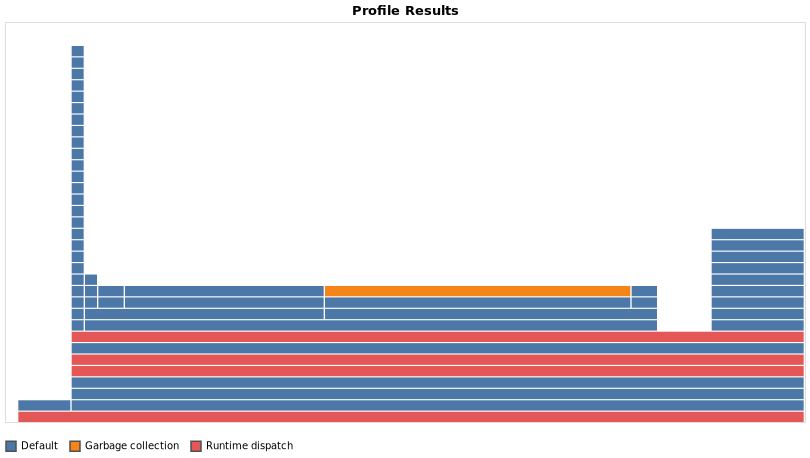

In [29]:
ProfileVega.view()

In [30]:
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
 4╎4   In[24]:3; one_iteration_michelot(::Array{Fl...
  ╎55  @Base/task.jl:356; (::IJulia.var"#15#18")()
  ╎ 55  @IJulia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  ╎  55  @Base/essentials.jl:709; invokelatest
  ╎   55  @Base/essentials.jl:710; #invokelatest#1
  ╎    55  .../execute_request.jl:67; execute_request(::ZMQ.Socket, :...
  ╎     55  .../SoftGlobalScope.jl:65; softscope_include_string(::Mod...
 4╎    ╎ 55  @Base/loading.jl:1091; include_string(::Function, :...
  ╎    ╎  1   In[24]:2; one_iteration_michelot(::Arr...
  ╎    ╎   1   @Base/reducedim.jl:722; sum
  ╎    ╎    1   @Base/reducedim.jl:722; #sum#627
  ╎    ╎     1   @Base/reducedim.jl:726; _sum
  ╎    ╎    ╎ 1   @Base/reducedim.jl:727; _sum
  ╎    ╎    ╎  1   @Base/reducedim.jl:310; mapreduce
  ╎    ╎    ╎   1   @Base/reducedim.jl:310; #mapreduce#620
  ╎    ╎    ╎    1   @Base/reducedim.jl:318; _mapreduce_dim
  ╎    ╎    ╎     1   @Base/reduce.jl:415; _mapreduc